In [1]:
import pandas as pd
#mettere .xlsx dopo il nome del documento excel
df = pd.read_excel (r'C:\Users\thomas\Documents\università\valetti\2E.xlsx') 
df.columns = ['s', 'v_norm', 'v_inib', 'conc_inib'] 
df
  #bisogna fare in modo che le colonne si rinomino da sole in s, v_norm, v_inib, in modo che si adatti allo script
    # la griglia deve essere in alto a sinistra nel foglio excel, e avere una sola riga di nomi, e in ordine di colonna: substr, v normale, v inibita

,s,v_norm,v_inib,conc_inib
0,2.000,0.02850,0.01100,1.0
1,1.000,0.02450,0.00900,NaN
2,0.600,0.02025,0.00600,NaN
3,0.400,0.01650,0.00450,NaN
4,0.267,0.01325,0.00296,NaN
5,0.200,0.01100,0.00210,NaN


In [2]:
from bokeh.plotting import figure, show, output_notebook
param = dict(width = 700, height = 250,
             tools = 'wheel_zoom, reset,pan, box_zoom',
             tooltips = [( 'substrate',   '@s'), ( 'velocity',   '@v')],
            )
output_notebook()

Loading BokehJS ...

In [3]:
p = figure(x_axis_label='Concentrazione substrato',
           y_axis_label='Velocità di reazione',
           **param,
           )
p.circle( 's', 'v_norm', source=df )
p.square('s', 'v_inib', source=df) 
show( p )
print('the square values are the inhibited ones')

the square values are the inhibited ones


In [4]:
df['1/s'] = 1/df['s']
df['1/v_norm'] = 1/df['v_norm']
df['1/v_inib']= 1/df['v_inib']
df


,s,v_norm,v_inib,conc_inib,1/s,1/v_norm,1/v_inib
0,2.000,0.02850,0.01100,1.0,0.500000,35.087719,90.909091
1,1.000,0.02450,0.00900,NaN,1.000000,40.816327,111.111111
2,0.600,0.02025,0.00600,NaN,1.666667,49.382716,166.666667
3,0.400,0.01650,0.00450,NaN,2.500000,60.606061,222.222222
4,0.267,0.01325,0.00296,NaN,3.745318,75.471698,337.837838
5,0.200,0.01100,0.00210,NaN,5.000000,90.909091,476.190476


In [5]:
from scipy.stats import linregress
slope_norm, intercept_norm, r_value, p_value, std_err = linregress( df['1/s'], df['1/v_norm'] )
slope_norm, intercept_norm   
'The slope of the non-inhibited enzyme is {}, and the intercept of the non-inibited enzyme is {}'.format(slope_norm, intercept_norm)

'The slope of the non-inhibited enzyme is 12.475154503870172, and the intercept of the non-inibited enzyme is 28.746978615087194'

In [6]:
from scipy.stats import linregress
slope_inib, intercept_inib, r_value, p_value, std_err = linregress( df['1/s'], df['1/v_inib'] )
'The slope of the inhibited enzyme is {}, and the intercept of the inibited enzyme is {}'.format(slope_inib, intercept_inib)  

'The slope of the inhibited enzyme is 85.88894399526357, and the intercept of the inibited enzyme is 27.851205133903193'

In [7]:
from numpy import array 

In [8]:
#faccio un grafico con le 2 rette per capire il tipo di inibizione
p1 = figure(title = 'Linearizzazione di Lineweaver-Burk',
            x_axis_label= '1/s', 
            y_axis_label= '1/v',
            **param,
            )
p1.circle( '1/s', '1/v_norm', source=df )
xmax = df['1/s'].max() 
x = array( [-3, xmax] )       
y = x * slope_norm + intercept_norm 
p1.line( x, y, color='green')

p1.square( '1/s', '1/v_inib', source=df)
     
y = x * slope_inib + intercept_inib 
p1.line( x, y, color='red')
show( p1 )

In [14]:
#calcolo il punto di incontro delle rette, fondamentale per definire il tipo di inibizione
slope_x= slope_norm-slope_inib

intercept_x= -intercept_norm+intercept_inib
intersec_x=intercept_x/slope_x
intersec_x
intersec_y= slope_norm*intersec_x+intercept_norm
intersec_y

p1.triangle( intersec_x, intersec_y, color='black')

show( p1 )
print("The intersection of the 2 lines is at:(" +str(intersec_x)+ ','+str(intersec_y)+'), the black dot stands for the interception point of the 2 lines.')


The intersection of the 2 lines is at:(0.012201706074429197,28.89919678357651), the black dot stands for the interception point of the 2 lines.


In [10]:
#si studia ora l'inibizione con la prima linearizzazione 
#1/v = 1/s * B *(Km/Vmax) + A/Vmax


In [11]:
a=slope_inib/slope_norm
b=intercept_inib/intercept_norm
Kei= df['conc_inib']/(a-1)
print("The facteor a is: "+str( a)+', and the factor b is: '+str( b)+' and the Kei is: '+str(Kei)+' .')
# tutti i NaN sono dovuti alla mancanza del valore dell inibente, per ora non so come toglierlo

The facteor a is: 6.884800021404001, and the factor b is: 0.9688393868038057 and the Kei is: 0    0.169929
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
Name: conc_inib, dtype: float64 .


In [12]:
#sperimento nuovi grafici

import matplotlib.pyplot as plt
import numpy as np

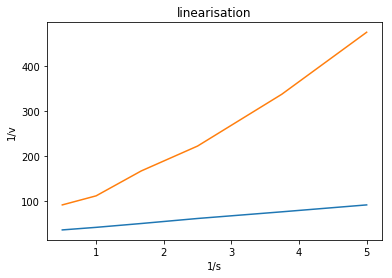

In [13]:

x = df['1/s']
y = df['1/v_norm']
x1= df['1/s']
y1= df['1/v_inib']
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x1, y1)
ax.set_ylabel('1/v')
ax.set_xlabel('1/s')
ax.set_title('linearisation')
plt.show()